In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

## Canny Filter

La función cv2.Canny en OpenCV se utiliza para detectar bordes en una imagen mediante el algoritmo de detección de bordes Canny. Esta función toma varios parámetros que afectan cómo se realiza la detección de bordes. Aquí están los parámetros más comunes explicados con detalle:

imagen: La imagen de entrada en escala de grises en la que deseas detectar bordes. La detección de bordes se realiza en una imagen en escala de grises, por lo que si tienes una imagen en color, debes convertirla previamente a escala de grises utilizando cv2.cvtColor.

umbral1 y umbral2: Estos dos valores representan los umbrales mínimo y máximo del gradiente de intensidad. Los píxeles con valores de gradiente dentro de este rango se consideran bordes potenciales. La detección de bordes Canny utiliza estos umbrales para determinar qué píxeles son considerados como bordes. Puedes ajustar estos valores según tus necesidades.

apertureSize (Tamaño del Aperture): Este parámetro controla el tamaño del kernel utilizado para calcular los gradientes de intensidad de la imagen. Especifica el tamaño de la vecindad utilizada para calcular la derivada de Sobel (gradiente) en cada punto de la imagen. Los valores comunes suelen ser 3 o 5. Un valor más grande proporciona una detección de bordes más suave, pero puede perder detalles más pequeños.

L2gradient (Gradiente L2): Este parámetro es un valor booleano (True o False) que controla el cálculo del gradiente. Si se establece en True, se utiliza el cálculo del gradiente L2 (norma euclidiana) que es más preciso pero más lento. Si se establece en False, se utiliza el cálculo del gradiente L1 (norma de valor absoluto), que es más rápido pero menos preciso. Usar L2gradient=True es recomendable en la mayoría de los casos para obtener resultados más precisos.

detectores de bordes: Además de los parámetros mencionados, cv2.Canny también acepta otros argumentos relacionados con el cálculo de gradientes, pero en la mayoría de los casos, no es necesario ajustarlos.

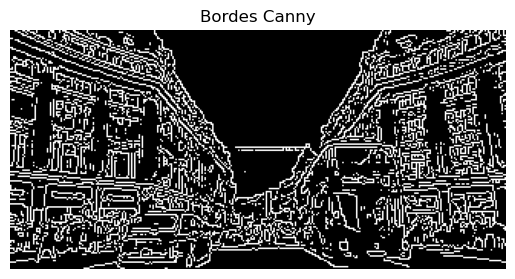

In [16]:
# Cargar una imagen en escala de grises
imagen = cv2.imread('./imgs/londres.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar el detector de bordes Canny
bordes = cv2.Canny(imagen, 240, 245)

# Mostrar la imagen de bordes utilizando matplotlib
plt.imshow(bordes, cmap='gray')
plt.title('Bordes Canny')
plt.axis('off')
plt.show()


(array([[[ 746,  891]],

       [[ 745,  892]],

       [[ 737,  892]],

       [[ 736,  893]],

       [[ 730,  893]],

       [[ 729,  894]],

       [[ 725,  894]],

       [[ 724,  895]],

       [[ 721,  895]],

       [[ 720,  896]],

       [[ 717,  896]],

       [[ 716,  897]],

       [[ 713,  897]],

       [[ 712,  898]],

       [[ 711,  898]],

       [[ 710,  899]],

       [[ 708,  899]],

       [[ 707,  900]],

       [[ 705,  900]],

       [[ 704,  901]],

       [[ 702,  901]],

       [[ 701,  902]],

       [[ 699,  902]],

       [[ 698,  903]],

       [[ 697,  903]],

       [[ 696,  904]],

       [[ 695,  904]],

       [[ 694,  905]],

       [[ 693,  905]],

       [[ 692,  906]],

       [[ 690,  906]],

       [[ 689,  907]],

       [[ 688,  907]],

       [[ 686,  909]],

       [[ 684,  909]],

       [[ 682,  911]],

       [[ 681,  911]],

       [[ 680,  912]],

       [[ 679,  912]],

       [[ 678,  913]],

       [[ 677,  913]],

       [[ 675, 

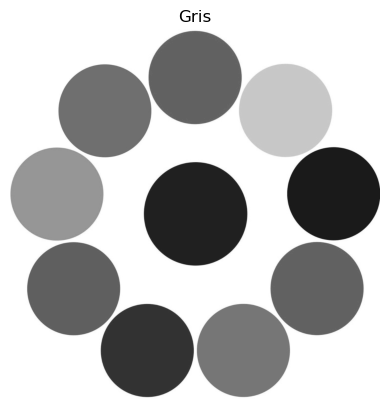

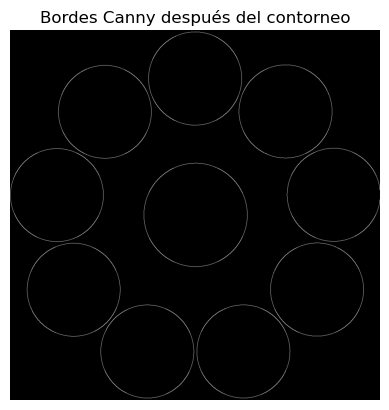

Número de contornos encontrados = 10


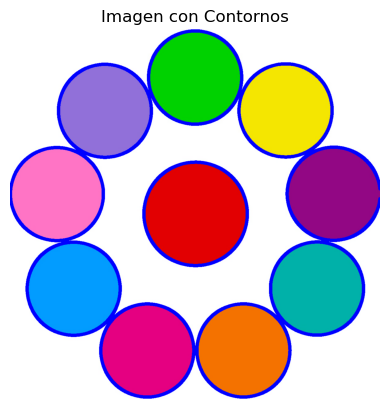

In [28]:
# Cargar una imagen que contiene objetos (por ejemplo, círculos) en color
imagen = cv2.imread("./imgs/circulos.jpg")

# Convertir la imagen a escala de grises
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Encontrar los bordes usando el detector de bordes Canny
bordes = cv2.Canny(imagen_gris, 100, 200)

# Encontrar contornos en la imagen de bordes
contornos, jerarquia = cv2.findContours(bordes, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contornos)

print(len(contornos[1]))

# Mostrar la imagen de bordes después de encontrar los contornos
plt.imshow(imagen_gris, cmap='gray')
plt.title('Gris')
plt.axis('off')
plt.show()

# Mostrar la imagen de bordes después de encontrar los contornos
plt.imshow(bordes, cmap='gray')
plt.title('Bordes Canny después del contorneo')
plt.axis('off')
plt.show()

# Imprimir el número de contornos encontrados
print("Número de contornos encontrados = " + str(len(contornos)))

# Crear una copia de la imagen original para dibujar los contornos
imagen_contornos = imagen.copy()

# Dibujar todos los contornos en la imagen
# El último parámetro (-1) significa que se dibujarán todos los contornos
cv2.drawContours(imagen_contornos, contornos, -1, (255, 0, 0), 10)

# Convertir la imagen de BGR (OpenCV) a RGB (Matplotlib)
imagen_rgb = cv2.cvtColor(imagen_contornos, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con los contornos utilizando Matplotlib
plt.imshow(imagen_rgb)
plt.title('Imagen con Contornos')
plt.axis('off')
plt.show()


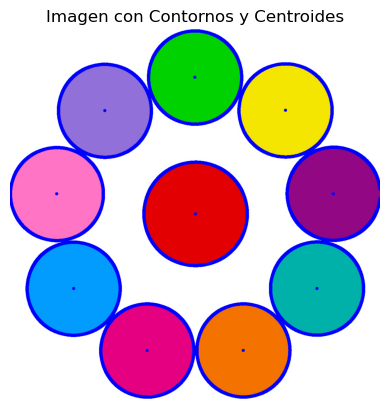

Número de contornos encontrados = 10


[756, 444, 206, 995, 601, 151, 1048, 307, 893, 599]

In [32]:
centroides_x = []
centroides_y = []


# Calcular y dibujar los centroides de los contornos
for contorno in contornos:
    momentos = cv2.moments(contorno)
    if momentos["m00"] != 0:
        centroide_x = int(momentos["m10"] / momentos["m00"])
        centroide_y = int(momentos["m01"] / momentos["m00"])
        #cv2.circle(imagen_contornos, (centroide_x, centroide_y), 5, (255, 0, 0), -1)
        centroides_x.append(centroide_x)
        centroides_y.append(centroide_y)

# Convertir la imagen de BGR (OpenCV) a RGB (Matplotlib)
imagen_rgb = cv2.cvtColor(imagen_contornos, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con los contornos y los centroides utilizando Matplotlib
plt.imshow(imagen_rgb)
plt.title('Imagen con Contornos y Centroides')
plt.axis('off')
plt.show()

# Imprimir el número de contornos encontrados
print("Número de contornos encontrados = " + str(len(contornos)))
centroides_x

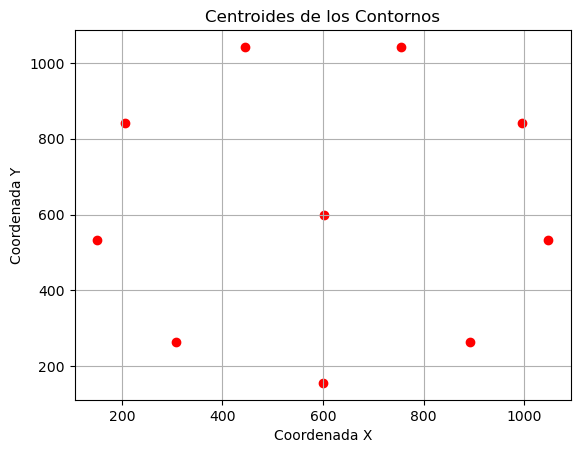

Número de contornos encontrados = 10


In [109]:


# Crear una gráfica para mostrar los centroides
plt.scatter(centroides_x, centroides_y, c='r', marker='o', label='Centroides')
plt.title('Centroides de los Contornos')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Mostrar la gráfica

plt.grid(True)
plt.show()

# Imprimir el número de contornos encontrados
print("Número de contornos encontrados = " + str(len(contornos)))


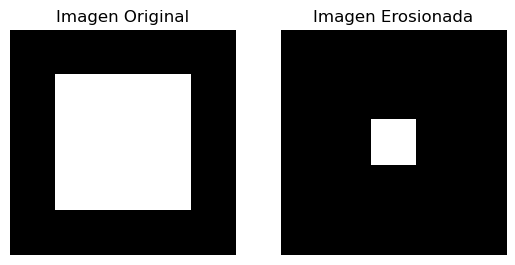

In [7]:
# Crear una imagen binaria simple
imagen_binaria = np.array([[0, 0, 0, 0, 0],
                           [0, 1, 1, 1, 0],
                           [0, 1, 1, 1, 0],
                           [0, 1, 1, 1, 0],
                           [0, 0, 0, 0, 0]], dtype=np.uint8)

# Crear un kernel (elemento estructurante) para la erosión
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]], dtype=np.uint8)

# Aplicar erosión a la imagen binaria
imagen_erosionada = cv2.erode(imagen_binaria, kernel, iterations=1)

# Mostrar la imagen original y la imagen erosionada
plt.subplot(121)
plt.imshow(imagen_binaria, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(imagen_erosionada, cmap='gray')
plt.title('Imagen Erosionada')
plt.axis('off')

plt.show()


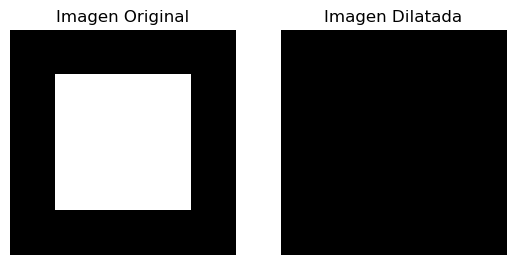

In [3]:
# Crear una imagen binaria simple
imagen_binaria = np.array([[0, 0, 0, 0, 0],
                           [0, 1, 1, 1, 0],
                           [0, 1, 1, 1, 0],
                           [0, 1, 1, 1, 0],
                           [0, 0, 0, 0, 0]], dtype=np.uint8)

# Crear un kernel (elemento estructurante) para la dilatación
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]], dtype=np.uint8)

# Aplicar dilatación a la imagen binaria
imagen_dilatada = cv2.dilate(imagen_binaria, kernel, iterations=1)

# Mostrar la imagen original y la imagen dilatada
plt.subplot(121)
plt.imshow(imagen_binaria, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(imagen_dilatada, cmap='gray')
plt.title('Imagen Dilatada')
plt.axis('off')

plt.show()

In [4]:

kernel_erosion_3x3 = np.array([[1, 1, 1],
                               [1, 1, 1],
                               [1, 1, 1]], dtype=np.uint8)


kernel_erosion_cross_3x3 = np.array([[0, 1, 0],
                                     [1, 1, 1],
                                     [0, 1, 0]], dtype=np.uint8)


In [5]:

# Tamaño del kernel (asegúrate de que sea un número impar para que tenga un centro)
tamaño_kernel = 7

# Crear una matriz de ceros del tamaño especificado
kernel_circulo = np.zeros((tamaño_kernel, tamaño_kernel), dtype=np.uint8)

# Calcular el centro del kernel
centro_x, centro_y = tamaño_kernel // 2, tamaño_kernel // 2

# Calcular el radio del círculo
radio = tamaño_kernel // 2

# Llenar la matriz con un círculo de unos
for i in range(tamaño_kernel):
    for j in range(tamaño_kernel):
        if (i - centro_x) ** 2 + (j - centro_y) ** 2 <= radio ** 2:
            kernel_circulo[i, j] = 1

print(kernel_circulo)


[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]
